# 引用元
https://qiita.com/takugenn/items/44bf9cd78824ce7892d5#36-単語の出現頻度

In [4]:
# -*- coding: utf-8 -*-

import MeCab

def create_MeCabFile(filename):
    # 形態素解析の結果を.mecabファイルに格納
    with open(filename) as data_file, open(filename + '.mecab', 'w') as out_file:
        mecab = MeCab.Tagger()
        out_file.write(mecab.parse(data_file.read()))

def mapping_MeCab(mecabFilename):

    with open(mecabFilename, encoding='utf-8') as mecabFile:
        sentense = []
        sentenses = []

        for morpheme in mecabFile.read().split('\n'):
            # MeCabの形態素解析結果
            # 　→　表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

            # 解析結果をタブで区切る
            surfase = morpheme.split('\t')

            # 解析結果が出力されている行（＝タブがある行）のみ処理対象
            if len(surfase) >= 2:
                # 残りをカンマで区切る
                result = surfase[1].split(',')

                # 結果をマッピングで格納
                word = {
                    'surface' : surfase[0],
                    'base' : result[6],
                    'pos' : result[0],
                    'pos1' : result[1]
                }
                # 1文単位のリストに追加
                sentense.append(word)

                # 句点か空白があったら終了
                if word['pos1'] == '句点':# or word['pos1'] == '空白':
                    sentenses.append(sentense)
                    # yield sentense
                    sentense = []

    return sentenses

In [5]:
import analytics_by_MeCab
analytics_by_MeCab.create_MeCabFile('neko.txt')
morphenes = analytics_by_MeCab.mapping_MeCab('neko.txt.mecab')
morphenes

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
  {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
  {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'}

31. 動詞

動詞の表層形をすべて抽出せよ．

In [7]:
import analytics_by_MeCab
result_mecab = analytics_by_MeCab.mapping_MeCab('neko.txt.mecab')
surface = []
for sentnese in result_mecab:
    for morphene in sentnese:
        if morphene['pos'] == '動詞':
            surface.append(morphene['surface'])

surface

['生れ',
 'つか',
 'し',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい',
 '見',
 '見',
 '思っ',
 '残っ',
 'いる',
 'さ',
 'れ',
 'し',
 '逢っ',
 '出会わ',
 'し',
 'なら',
 'し',
 'いる',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'おっ',
 'する',
 'し',
 '始め',
 '動く',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '助から',
 '思っ',
 'いる',
 'さり',
 'し',
 '出',
 'し',
 'いる',
 '考え出そ',
 '分ら',
 '付い',
 '見る',
 'い',
 'おっ',
 '見え',
 '隠し',
 'しまっ',
 '違っ',
 '明い',
 'い',
 'られ',
 '這い出し',
 '見る',
 '棄て',
 'られ',
 '這い出す',
 'ある',
 '坐っ',
 'し',
 '考え',
 '見',
 '出',
 'し',
 '泣い',
 '来',
 'くれる',
 '考え付い',
 'やっ',
 '見',
 '来',
 '渡っ',
 'かかる',
 '減っ',
 '来',
 '泣き',
 '出',
 'ある',
 'ある',
 'し',
 'そろ',
 '廻り',
 '始め',
 'し',
 '這っ',
 '行く',
 '出',
 '這入っ',
 'なる',
 '思っ',
 '崩れ',
 'もぐり込ん',
 '破れ',
 'い',
 'し',
 '知れ',
 '云っ',
 '至る',
 'する',
 'なっ',
 'いる',
 '忍び込ん',
 '分ら',
 'なる',
 '減る',
 '降っ',
 '来る',
 '出来',
 'なっ',
 'あるい',
 '行く',
 '考える',
 '這入っ',
 'おっ',
 '見る',
 'し',
 '逢っ',
 '見る',
 'つかん',
 '抛り出し',
 '思っ',
 'ねぶっ',
 '任せ',
 'い',
 '出来',
 '見'

32. 動詞の原形

動詞の原形をすべて抽出せよ．
結果

In [9]:
base = []
for sentnese in result_mecab:
    for morphene in sentnese:
        if morphene['pos'] == '動詞':
            base.append(morphene['base'])

In [10]:
base

['生れる',
 'つく',
 'する',
 '泣く',
 'する',
 'いる',
 '始める',
 '見る',
 '聞く',
 '捕える',
 '煮る',
 '食う',
 '思う',
 '載せる',
 'られる',
 '持ち上げる',
 'られる',
 'する',
 'ある',
 '落ちつく',
 '見る',
 '見る',
 '思う',
 '残る',
 'いる',
 'する',
 'れる',
 'する',
 '逢う',
 '出会う',
 'する',
 'なる',
 'する',
 'いる',
 '吹く',
 'する',
 '弱る',
 '飲む',
 '知る',
 '坐る',
 'おる',
 'する',
 'する',
 '始める',
 '動く',
 '動く',
 '分る',
 '廻る',
 'なる',
 '助かる',
 '思う',
 'いる',
 'さる',
 'する',
 '出る',
 'する',
 'いる',
 '考え出す',
 '分る',
 '付く',
 '見る',
 'いる',
 'おる',
 '見える',
 '隠す',
 'しまう',
 '違う',
 '明く',
 'いる',
 'られる',
 '這い出す',
 '見る',
 '棄てる',
 'られる',
 '這い出す',
 'ある',
 '坐る',
 'する',
 '考える',
 '見る',
 '出る',
 'する',
 '泣く',
 '来る',
 'くれる',
 '考え付く',
 'やる',
 '見る',
 '来る',
 '渡る',
 'かかる',
 '減る',
 '来る',
 '泣く',
 '出る',
 'ある',
 'ある',
 'する',
 'そる',
 '廻る',
 '始める',
 'する',
 '這う',
 '行く',
 '出る',
 '這入る',
 'なる',
 '思う',
 '崩れる',
 'もぐり込む',
 '破れる',
 'いる',
 'する',
 '知れる',
 '云う',
 '至る',
 'する',
 'なる',
 'いる',
 '忍び込む',
 '分る',
 'なる',
 '減る',
 '降る',
 '来る',
 '出来る',
 'なる',
 'あるく',
 '行く',
 '考える',
 '這入る',
 'おる',
 '見る',
 'する',
 '逢う',
 '見る',
 'つか

33. サ変名詞

サ変接続の名詞をすべて抽出せよ．
結果

In [11]:
noun = []
for sentnese in result_mecab:
    for morphene in sentnese:
        if morphene['base'] != '*': # '--'が検出される対策
            if morphene['pos'] == '名詞' and morphene['pos1'] == 'サ変接続':
               noun.append(morphene['base'])

noun

['見当',
 '記憶',
 '話',
 '装飾',
 '突起',
 '運転',
 '記憶',
 '分別',
 '決心',
 '我慢',
 '餓死',
 '訪問',
 '始末',
 '猶予',
 '遭遇',
 '我慢',
 '記憶',
 '返報',
 '勉強',
 '勉強',
 '昼寝',
 '珍重',
 '昼寝',
 '経験',
 '供',
 '供',
 '供',
 '供',
 '同居',
 '観察',
 '断言',
 '同衾',
 '供',
 '迫害',
 '尊敬',
 '生活',
 '剿滅',
 '議論',
 '所有',
 '憤慨',
 '観念',
 '御馳走',
 '掠奪',
 '代言',
 '我儘',
 '我儘',
 '失敗',
 '話',
 '投書',
 '関',
 '決心',
 '昼寝',
 '鑑定',
 '話',
 '述懐',
 '想像',
 '写生',
 '感心',
 '昼寝',
 '失笑',
 '揶揄',
 '写生',
 '欠伸',
 '自白',
 '彩色',
 '写生',
 '判然',
 '心中',
 '感服',
 '小便',
 '猶予',
 '失敬',
 '欠伸',
 '予定',
 '失望',
 '漫罵',
 '小便',
 '増長',
 '増長',
 '我儘',
 '我慢',
 '報道',
 '供',
 '昼寝',
 '退屈',
 '加減',
 '一睡',
 '運動',
 '嘆賞',
 '佇立',
 '記憶',
 '珍重',
 '身動き',
 '挨拶',
 '鼓動',
 '軽蔑',
 '察',
 '肥満',
 '御馳走',
 '乱暴',
 '教育',
 '交際',
 '同盟',
 '敬遠',
 '軽侮',
 '問答',
 '御馳走',
 '邂逅',
 '邂逅',
 '相当',
 '雑談',
 '自慢',
 '質問',
 '発達',
 '比較',
 '覚悟',
 '自慢',
 '感心',
 '謹聴',
 '呼吸',
 '弁護',
 '思案',
 '吶喊',
 '掃除',
 '感心',
 '喝采',
 '質問',
 '反対',
 '呈出',
 '大息',
 '加減',
 '決心',
 '御馳走',
 '御馳走',
 '要心',
 '放蕩',
 '放蕩',
 '放蕩',
 '放蕩',
 '放蕩',
 '放蕩',
 '自任',
 '放蕩',
 '卒業

34. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．
結果

In [12]:
noun_phrases = []
for sentense in result_mecab:
    for i in range(len(sentense)):
        if sentense[i]['surface'] == 'の' and sentense[i - 1]['pos'] == '名詞' and sentense[i + 1]['pos'] == '名詞':
            noun_phrases.append(sentense[i - 1]['surface'] + sentense[i]['surface'] + sentense[i + 1]['surface']) 
noun_phrases

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 '池の前',
 '池の上',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '彼の書生',
 '以外の人間',
 '前の書生',
 'おさんの隙',
 'おさんの三',
 '胸の痞',
 '家の主人',
 '主人の方',
 '鼻の下',
 '吾輩の顔',
 '自分の住',
 '吾輩の主人',
 '家のもの',
 'うちのもの',
 '彼の書斎',
 '本の上',
 '皮膚の色',
 '本の上',
 '彼の毎夜',
 '以外のもの',
 '主人の傍',
 '彼の膝',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'ここのうち',
 '供の寝床',
 '彼等の中間',
 '供の一',
 '例の神経',
 '性の主人',
 '次の部屋',
 '自分の勝手',
 '吾輩の方',
 '台所の板の間',
 '吾輩の尊敬',
 '向の白',
 '玉のよう',
 'そこの家',
 '家の書生',
 '裏の池',
 '親子の愛',
 'もっともの議論',
 '刺の頭',
 '鰡の臍',
 '彼等のため',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '吾輩の家',
 '家の主人',
 'だらけの英文',
 '胃弱の癖',
 '後架の中',
 '平の宗',
 '月の月給',
 '当分の間',
 '下のよう',
 '今更のよう',
 '主人の述懐',
 '彼の友',
 '金縁の眼鏡',
 '主人の顔',
 '内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '吾輩の後ろ',
 '彼の友',
 '吾輩の輪廓',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '不器量の吾輩',
 '吾輩の主人',
 '斯産の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '悪口の言いよう',
 '人の気',
 '彼の背中',
 'こっちの便利',
 '自己

35. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


In [15]:
nouns = []
for sentense in result_mecab:
    for morphene in sentense:
        if morphene['pos'] == '名詞':
            noun.append(morphene['surface'])
        else:
            if len(noun) >= 2:
                nouns.append(''.join(noun))
            noun = []
    # 文が名詞で終わる場合
    if len(noun) >= 2:
        nouns.append(''.join(noun))
    noun = []
nouns

['人間中',
 '一番獰悪',
 '時妙',
 '一毛',
 'その後猫',
 '一度',
 'ぷうぷうと煙',
 '邸内',
 '三毛',
 '書生以外',
 '四五遍',
 'この間おさん',
 '三馬',
 '御台所',
 'まま奥',
 '住家',
 '終日書斎',
 '勉強家',
 '勉強家',
 '勤勉家',
 '二三ページ',
 '主人以外',
 '限り吾輩',
 '朝主人',
 '一番心持',
 '二人',
 '一つ床',
 '一人',
 '最後大変',
 '——猫',
 '神経胃弱性',
 '物指',
 '尻ぺたをひどく',
 '言語同断',
 '家内総がかり',
 '筋向',
 '白君',
 '度毎',
 '白君',
 '先日玉',
 '四疋',
 '三日目',
 '四疋',
 '白君',
 '我等猫族',
 '家族的生活',
 '三毛君',
 '所有権',
 '我々同族間',
 '目刺',
 '一番先',
 '彼等人間',
 '我等',
 '吾人',
 '白君',
 '三毛君',
 'いくら人間',
 '間違いだらけ',
 '後架先生',
 '宗盛',
 '宗盛',
 '月給日',
 '水彩絵具',
 '毎日毎日書斎',
 '人の',
 '自ら筆',
 '眼鏡越',
 '一室内',
 '以太利',
 '大家アンドレア・デル・サルト',
 '露華',
 '寒鴉',
 'これ一幅',
 '活画',
 '翌日吾輩',
 '一分',
 '辛棒',
 '今吾輩',
 '今吾輩',
 '波斯産',
 'ただ一種',
 '上不思議',
 '盲猫',
 '心中ひそか',
 'いくらアンドレア・デル・サルト',
 '一分',
 'あと大',
 '壊わし',
 '馬鹿野郎',
 '馬鹿野郎',
 '辛棒',
 '馬鹿野郎呼わり',
 '平生吾輩',
 '馬鹿野郎',
 '元来人間',
 'みんな増長',
 '先どこ',
 '数倍',
 '十坪',
 '腹加減',
 '穏かな日',
 '二時頃',
 '昼飯後',
 '運動かたがた',
 '一本一本',
 '杉垣',
 '前後不覚',
 '庭内',
 '忍び入り',
 '黒猫',
 '柔毛',
 '出ずるよう',
 '猫中',
 '杉垣',
 '二三枚',
 'ぐべき力',
 '険呑',
 '時吾輩',
 '言葉付

36. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [17]:
import collections
word_counter = collections.Counter()
for sentense in result_mecab:
    word_counter.update(morphene['surface'] for morphene in sentense)

word_counter.most_common()

[('の', 9194),
 ('。', 7486),
 ('て', 6873),
 ('、', 6772),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('と', 5515),
 ('が', 5339),
 ('た', 3989),
 ('で', 3813),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2391),
 ('だ', 2367),
 ('し', 2328),
 ('から', 2043),
 ('ある', 1730),
 ('な', 1612),
 ('ん', 1568),
 ('か', 1531),
 ('いる', 1251),
 ('事', 1207),
 ('へ', 1034),
 ('する', 998),
 ('う', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 697),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 554),
 ('何', 539),
 ('なる', 531),
 ('さ', 513),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 477),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 395),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 345),
 ('時', 344),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('——', 319),
 ('ところ', 315),
 ('まで', 313),
 ('方', 312),
 ('三', 311),
 ('二', 302),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒

37. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<Container object of 10 artists>

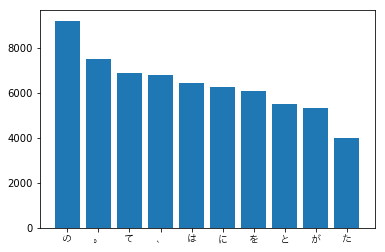

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.font_manager import FontProperties

fp = FontProperties(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc')
dataset = list(zip(*word_counter.most_common(10)))
plt.xticks(range(len(dataset[0])), dataset[0], fontproperties=fp)
plt.bar(range(len(dataset[0])), dataset[1], align='center')

zip()について

以前取り上げたzip関数だが、引数に「*」をつけると元に戻せるらしい。

In [65]:
dataset

[('の',
  '。',
  'て',
  '、',
  'は',
  'に',
  'を',
  'と',
  'が',
  'た',
  'で',
  '「',
  '」',
  'も',
  'ない',
  'だ',
  'し',
  'から',
  'ある',
  'な',
  'ん',
  'か',
  'いる',
  '事',
  'へ',
  'する',
  'う',
  'もの',
  '君',
  'です',
  '云う',
  '主人',
  'よう',
  'ね',
  'この',
  '御',
  'ば',
  '人',
  'その',
  '一',
  'そう',
  '何',
  'なる',
  'さ',
  'よ',
  'なら',
  '吾輩',
  'い',
  'ます',
  'じゃ',
  '…',
  'これ',
  '\u3000',
  'なっ',
  'それ',
  '来',
  'れ',
  '見',
  'でも',
  '時',
  '迷亭',
  'ませ',
  'いい',
  '——',
  'ところ',
  'まで',
  '方',
  '三',
  '二',
  'ず',
  '上',
  'まし',
  '寒月',
  '顔',
  'ぬ',
  '先生',
  '見る',
  '人間',
  'だろ',
  'くらい',
  '僕',
  'たら',
  'さん',
  'なく',
  '気',
  'あり',
  '猫',
  'だけ',
  '出',
  '出来',
  '云っ',
  'また',
  '中',
  '思っ',
  'ばかり',
  '十',
  'ごとく',
  'あっ',
  'どう',
  'って',
  '細君',
  'など',
  '今',
  '鼻',
  '大',
  'や',
  '者',
  'そんな',
  'あの',
  'しかし',
  'てる',
  'より',
  'ながら',
  '自分',
  'ので',
  '少し',
  '頭',
  'ちょっと',
  'でしょ',
  '訳',
  '前',
  '声',
  'かい',
  '日',
  'うち',
  'ただ',
  '知れ',
  'ほど',
  '聞い',
  'として',
  '私'

In [39]:
list(zip(*dataset))

[('の', 9194),
 ('。', 7486),
 ('て', 6873),
 ('、', 6772),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('と', 5515),
 ('が', 5339),
 ('た', 3989)]

38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [68]:
dataset = list(zip(*word_counter.most_common()))

In [69]:
dataset

[('の',
  '。',
  'て',
  '、',
  'は',
  'に',
  'を',
  'と',
  'が',
  'た',
  'で',
  '「',
  '」',
  'も',
  'ない',
  'だ',
  'し',
  'から',
  'ある',
  'な',
  'ん',
  'か',
  'いる',
  '事',
  'へ',
  'する',
  'う',
  'もの',
  '君',
  'です',
  '云う',
  '主人',
  'よう',
  'ね',
  'この',
  '御',
  'ば',
  '人',
  'その',
  '一',
  'そう',
  '何',
  'なる',
  'さ',
  'よ',
  'なら',
  '吾輩',
  'い',
  'ます',
  'じゃ',
  '…',
  'これ',
  '\u3000',
  'なっ',
  'それ',
  '来',
  'れ',
  '見',
  'でも',
  '時',
  '迷亭',
  'ませ',
  'いい',
  '——',
  'ところ',
  'まで',
  '方',
  '三',
  '二',
  'ず',
  '上',
  'まし',
  '寒月',
  '顔',
  'ぬ',
  '先生',
  '見る',
  '人間',
  'だろ',
  'くらい',
  '僕',
  'たら',
  'さん',
  'なく',
  '気',
  'あり',
  '猫',
  'だけ',
  '出',
  '出来',
  '云っ',
  'また',
  '中',
  '思っ',
  'ばかり',
  '十',
  'ごとく',
  'あっ',
  'どう',
  'って',
  '細君',
  'など',
  '今',
  '鼻',
  '大',
  'や',
  '者',
  'そんな',
  'あの',
  'しかし',
  'てる',
  'より',
  'ながら',
  '自分',
  'ので',
  '少し',
  '頭',
  'ちょっと',
  'でしょ',
  '訳',
  '前',
  '声',
  'かい',
  '日',
  'うち',
  'ただ',
  '知れ',
  'ほど',
  '聞い',
  'として',
  '私'

(array([ 6201.,  2267.,  1116.,   686.,   537.,   348.,   276.,   241.,
          172.,   127.,   117.,   111.,   102.,    91.,    79.,    59.,
           53.,    60.,    48.,    48.,    22.,    29.,    37.,    36.,
           29.,    20.,    24.,    21.,    21.,    23.]),
 array([  1.        ,   1.96666667,   2.93333333,   3.9       ,
          4.86666667,   5.83333333,   6.8       ,   7.76666667,
          8.73333333,   9.7       ,  10.66666667,  11.63333333,
         12.6       ,  13.56666667,  14.53333333,  15.5       ,
         16.46666667,  17.43333333,  18.4       ,  19.36666667,
         20.33333333,  21.3       ,  22.26666667,  23.23333333,
         24.2       ,  25.16666667,  26.13333333,  27.1       ,
         28.06666667,  29.03333333,  30.        ]),
 <a list of 30 Patch objects>)

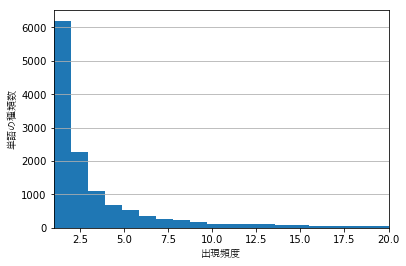

In [70]:
# ラベル・目盛りの追加
plt.xlabel('出現頻度', fontproperties=fp)
plt.ylabel('単語の種類数', fontproperties=fp)
plt.grid(axis='y')
# 出現頻度0が出てしまう対策
plt.xlim(xmin=1, xmax=20)
plt.hist(dataset[1], bins=30, range=(1, 30))

/Users/e155755/.pyenv/versions/anaconda3-4.3.1/envs/keras_36/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


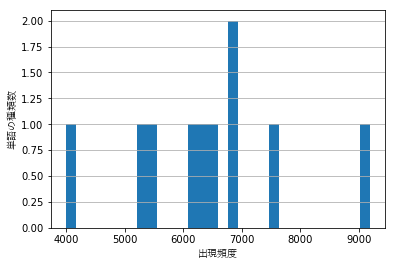

In [37]:
# datasetがおかしかった。10こ頻度を求めたままだと、単語10このヒストグラムになる。
# # ラベル・目盛りの追加
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('出現頻度', fontproperties=fp)
# ax.set_ylabel('単語の種類数', fontproperties=fp)
# ax.grid(axis='y')
# # 出現頻度0が出てしまう対策
# ax.hist(dataset[1], bins=30)
# fig.show()

39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

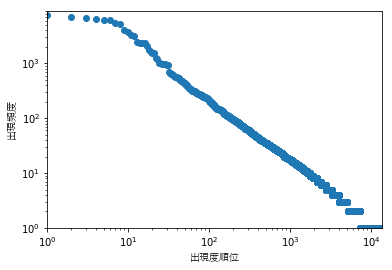

In [64]:
plt.scatter(range(len(dataset[1])), dataset[1])
# 対数化
plt.xscale('log')
plt.yscale('log')
# 軸の範囲調整
plt.xlim(1, len(dataset[0]))
plt.ylim(1, dataset[1][0])
# ラベルづけ
plt.xlabel('出現度順位', fontproperties=fp)
plt.ylabel('出現頻度', fontproperties=fp)

Zipfの法則とは

「n番目に多く現れる単語は、1番多く現れる単語のn分の1の確率で現れる」